In [1]:
#Extracting and installing the twint libraries

!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!git pull origin master
!pip install -r requirements.txt
!python setup.py install

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
From https://github.com/twintproject/twint
 * branch            master     -> FETCH_HEAD
Already up to date.
     |████████████████████████████████| 1.1 MB 7.4 MB/s 
     |████████████████████████████████| 263 kB 42.6 MB/s 
     |████████████████████████████████| 385 kB 50.5 MB/s 
     |████████████████████████████████| 271 kB 43.9 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 11.7 MB/s 
     |████████████████████████████████| 291 kB 40.6 MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=0d5876e45f20149b4aaacc4bd5025afc96dbf03ca4b8589b685fe84b52d50ebc
  Stored in directory: /root/.cache/pip/wheels

In [2]:
pip install aiohttp==3.7.0

     |████████████████████████████████| 1.3 MB 6.9 MB/s 
  Attempting uninstall: async-timeout
    Found existing installation: async-timeout 4.0.2
    Uninstalling async-timeout-4.0.2:
      Successfully uninstalled async-timeout-4.0.2
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.8.1
    Uninstalling aiohttp-3.8.1:
      Successfully uninstalled aiohttp-3.8.1


In [3]:
import twint
import nest_asyncio

nest_asyncio.apply()

In [4]:
# Finding 300 English tweets that contain the key words : Booster shot and Omicron 

import pandas as pd
c = twint.Config()

c.Search = "booster shot AND omicron"
c.Limit = 300
c.Lang= 'english'
c.Pandas = True

In [5]:
twint.run.Search(c)

1488256243223478277 2022-01-31 21:01:53 +0000 <jonniegg> Israeli officials reveal they were disappointed with the performance of the COVID vaccines “You refused to admit that the vaccinated are contagious despite the observations"  The Lancet  concluded that booster shots of mRNA vaccines failed to block Omicron  https://t.co/OOGJzkKa71
1488255270958604288 2022-01-31 20:58:01 +0000 <roberth48> @sir_glub @thedadpresents @joerogan @Spotify Thanks,Just what I said(Depends on what variant, when,if you received a vaccine, if you have had a booster) : "The CDC also highlighted the study took place before omicron became the dominant variant in the U.S. &amp; before the impact of booster shots could be adequately measured"
1488254548473171968 2022-01-31 20:55:09 +0000 <renri_hiyoku> See Israel and Denmark.  Booster shots boost Omicron…… 😵  Stop forcing us to get jab anymore!
1488253774653177857 2022-01-31 20:52:04 +0000 <OrganizeTexas> Mask up and get your booster shot to put yourself in the b

In [6]:
df = twint.storage.panda.Tweets_df

df.sample(5)

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
171,1487940819793465352,1487940819793465352,1.643588e+12,2022-01-31 00:08:30,+0000,,Booster shots of coronavirus vaccines are 90 p...,en,[],[],1435461,1435461,NYTScience,NYT Science,1,00,https://twitter.com/NYTScience/status/14879408...,[https://nyti.ms/3AL2qJV],[],0,,False,23,1,9,,booster shot AND omicron,,,,,,,[],,,,
165,1487959120686641152,1487959120686641152,1.643592e+12,2022-01-31 01:21:13,+0000,,Moderna Begins Testing Booster Shot Aimed at O...,en,[],[],37035026,37035026,ejayspharmacyrx,ejayspharmacyrx,1,01,https://twitter.com/ejayspharmacyrx/status/148...,[http://dlvr.it/SJ5JHD],[],0,,False,0,0,0,,booster shot AND omicron,,,,,,,[],,,,
297,1487647693908643842,1487336202629881861,1.643518e+12,2022-01-30 04:43:44,+0000,,@Mike_Rann Prior to Omicron in mid-December th...,en,[],[],26928835,26928835,csaw59,The_Wheeled_Flamingo,7,04,https://twitter.com/csaw59/status/148764769390...,[],[],0,,False,0,0,0,,booster shot AND omicron,,,,,,,"[{'screen_name': 'Mike_Rann', 'name': 'Mike Ra...",,,,
39,1488197357854412800,1488197357854412800,1.643649e+12,2022-01-31 17:07:54,+0000,,Interesting thread: to summarize if you're UNV...,en,[],[],38492666,38492666,shawnwenzel,Shawn Wenzel,1,17,https://twitter.com/shawnwenzel/status/1488197...,[],[],0,,False,0,1,2,https://twitter.com/DrEricDing/status/14878330...,booster shot AND omicron,,,,,,,[],,,,
299,1487640410663309313,1487604364261076993,1.643516e+12,2022-01-30 04:14:47,+0000,,@FluoridePoison @AnnastaciaMP 2X shots are not...,en,"[covidvaccines, omicron, omicron]",[],1268023502344384513,1268023502344384513,TaylorS11264605,TaylorSummers Sewer Rats Unite,7,04,https://twitter.com/TaylorS11264605/status/148...,[],[],0,,False,0,0,0,,booster shot AND omicron,,,,,,,"[{'screen_name': 'FluoridePoison', 'name': 'Ge...",,,,


In [7]:
df.to_csv('covid_tweets.csv')

from google.colab import files
files.download("covid_tweets.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
def columne_names():
  return twint.output.panda.Tweets_df.columns
  
def twint_to_pd(columns):
  return twint.output.panda.Tweets_df[columns]

In [9]:
data= twint_to_pd(["tweet"])
data.head(10)

,tweet
0,Israeli officials reveal they were disappointe...
1,@sir_glub @thedadpresents @joerogan @Spotify T...
2,See Israel and Denmark. Booster shots boost O...
3,Mask up and get your booster shot to put yours...
4,Hey You 👀 I just got my booster shot. 3 shots ...
5,@StevePriceMedia @AusTodayListnr The rate of i...
6,"With the emergence of the Omicron variant, the..."
7,"Right before the spring semester started, UVA ..."
8,@RONIN2421 @KoolLove2643 @IslandPirates77 @Ele...
9,Only about 40% of Americans have their #booste...


In [10]:
copy_data = data
copy_data.head(3)

,tweet
0,Israeli officials reveal they were disappointe...
1,@sir_glub @thedadpresents @joerogan @Spotify T...
2,See Israel and Denmark. Booster shots boost O...


## Method 1

In [11]:
copy_data['tweet'] = copy_data['tweet'].astype('str')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [12]:
copy_data["tweet"]= copy_data["tweet"].str.replace("[^a-zA-Z0–9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
copy_data['tweet']= copy_data['tweet'].str.lower()
copy_data.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,tweet
0,israeli officials reveal they were disappointe...
1,sir glub thedadpresents joerogan spotify t...
2,see israel and denmark booster shots boost o...
3,mask up and get your booster shot to put yours...
4,hey you i just got my booster shot shots ...
5,stevepricemedia austodaylistnr the rate of i...
6,with the emergence of the omicron variant the...
7,right before the spring semester started uva ...
8,ronin koollove islandpirates ele...
9,only about 0 of americans have their booste...


In [14]:
bcount = 0
vcount = 0
ecount = 0
ocount = 0
for i in range(len(copy_data)) :
    bcount = bcount + copy_data['tweet'][i].count("booster")
    vcount = vcount + copy_data['tweet'][i].count("vaccine")
    ecount = ecount + copy_data['tweet'][i].count("side effect")
    ocount = ocount + copy_data['tweet'][i].count("omicron")


print ("Number of occurences of word booster is "+ str(bcount))
print ("Number of occurences of word vaccine is "+ str(vcount))
print ("Number of occurences of word side effect is "+ str(ecount))
print ("Number of occurences of word omicron is "+ str(ocount))

Number of occurences of word booster is 365
Number of occurences of word vaccine is 105
Number of occurences of word side effect is 1
Number of occurences of word omicron is 337


{'Booster': 365, 'Omicron': 337, 'Vaccine': 105, 'Side effect': 1}


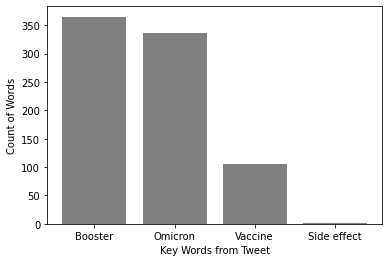

In [16]:
dictionary = {"Booster": bcount, "Omicron": ocount, "Vaccine": vcount, "Side effect": ecount}

import matplotlib.pyplot as plt
print(dictionary) 
plt.bar(list(dictionary.keys()), dictionary.values(), color= "grey")
plt.xlabel("Key Words from Tweet", fontsize=10)
plt.ylabel("Count of Words", fontsize=10)
plt.show()

## Method 2 : Using Natural Language Tool Kit

preprocessing steps : 

In [17]:
import nltk
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import re
import string
nltk.download("stopwords")
stopwords = stopwords.words('english')
ps= nltk.PorterStemmer()

data['tweet'] = data['tweet'].astype('str')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [18]:
#Removing punctuations
data["tweet"]= data["tweet"].str.replace("[^a-zA-Z0–9]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#Removing junk tweets (if any)
data['tweet']= data['tweet'].apply(lambda x: " ".join ([w for w in x.split() if len (w)>3]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
# Tokenizing and converting words to lower case
def tokenize(text):
  tokens = re.split("\W+", text)
  return tokens
  
data['tweet']= data['tweet'].apply (lambda x: tokenize(x.lower()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
#Removing articles or stop words from the data before counting as they don't have any significance
def remove_stopword(text):
  text_nostopword= [char for char in text if char not in stopwords]
  return text_nostopword
  
data['tweet']= data['tweet'].apply(lambda x: remove_stopword(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ps= nltk.PorterStemmer()

In [22]:
def stem(tweet_no_stopword):
  text = [ps.stem (word) for word in tweet_no_stopword]
  return text

data["tweet"]= data["tweet"].apply(lambda x: stem(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
data_list = data.loc[:,"tweet"].to_list()

In [24]:
flat_data_list = [item for sublist in data_list for item in sublist]

In [25]:
data_count= pd.DataFrame(flat_data_list)
data_count= data_count[0].value_counts()

In [26]:
from nltk.probability import FreqDist
freq_count = FreqDist()
for words in data_count:
  freq_count[words] +=1

freq_count

FreqDist({1: 1060,
          2: 206,
          3: 123,
          4: 65,
          5: 48,
          6: 32,
          7: 22,
          8: 11,
          9: 15,
          10: 10,
          11: 17,
          12: 11,
          13: 8,
          14: 6,
          15: 6,
          16: 7,
          17: 4,
          18: 3,
          19: 1,
          20: 1,
          21: 1,
          22: 1,
          24: 4,
          25: 1,
          26: 1,
          27: 3,
          33: 1,
          35: 2,
          37: 2,
          40: 1,
          43: 1,
          44: 2,
          51: 1,
          76: 1,
          93: 1,
          170: 2,
          337: 1,
          362: 1,
          367: 1})

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


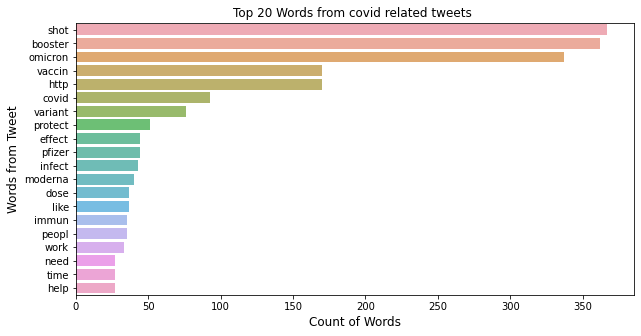

In [28]:
data_count = data_count[:20,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.values, data_count.index, alpha=0.8)
plt.title("Top 20 Words from covid related tweets ")
plt.ylabel("Words from Tweet", fontsize=12)
plt.xlabel("Count of Words", fontsize=12)
plt.show()